#### The City Record is the official journal of New York City, and provides information provided by city agencies. This data is available in searchable form online at the City Record Online (CROL). For this challenge, we will use a subset of the CROL data consisting only of procurement notices for goods and services.

1. Keep only rows with a StartDate occurring from 2010 to 2019, inclusive. Next, remove all rows for which the ContractAmount field is less than or equal to zero, or is missing entirely. Use this filtered data for the rest of the challenge, as well. For the remaining data, what is the total sum of contract amounts?

In [647]:
import pandas as pd
import os

In [648]:
os.chdir(os.getcwd())

In [649]:
df=pd.read_csv("/Users/xin/Downloads/Recent_Contract_Awards.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,14,15,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [650]:
pd.set_option('display.max_columns', None)

In [651]:
df.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20120228019,03/05/2012,03/05/2012,Homeless Services,Award,Human Services/Client Services,ANTI-EVICTION SERVICES,Negotiated Acquisition,Procurement,Other (Describe below in Other Legally Mandate...,07112A031412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-04(b)(2)(iii)of the Procurement Policy Board...,NaN,NaN,NaN,NaN,ANTI-EVICTION SERVICES - Negotiated Acquisitio...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214013,02/22/2013,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130131010,02/06/2013,02/06/2013,Parks and Recreation,Award,Services (other than human services),PARKS AND RECREATION NOTICES OF AWARD,Public Bid,Procurement,NaN,CWB2013A AND 2012A/B,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKS AND RECREATION NOTICES OF AWARD - Public...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20090911004,09/18/2009,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,......,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Since the concession will not yield a profit t...,NaN,NaN,NaN,NaN,"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140821015,08/28/2014,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35503 entries, 0 to 35502
Data columns (total 37 columns):
RequestID                       35503 non-null int64
StartDate                       35503 non-null object
EndDate                         35503 non-null object
AgencyName                      35503 non-null object
TypeOfNoticeDescription         35503 non-null object
CategoryDescription             35503 non-null object
ShortTitle                      35503 non-null object
SelectionMethodDescription      35503 non-null object
SectionName                     35503 non-null object
SpecialCaseReasonDescription    12605 non-null object
PIN                             35498 non-null object
DueDate                         0 non-null float64
AddressToRequest                311 non-null object
ContactName                     287 non-null object
ContactPhone                    409 non-null object
Email                           3 non-null object
ContractAmount                  35473 non

In [653]:
# change data type to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'])  

In [654]:
df.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20120228019,2012-03-05,03/05/2012,Homeless Services,Award,Human Services/Client Services,ANTI-EVICTION SERVICES,Negotiated Acquisition,Procurement,Other (Describe below in Other Legally Mandate...,07112A031412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-04(b)(2)(iii)of the Procurement Policy Board...,NaN,NaN,NaN,NaN,ANTI-EVICTION SERVICES - Negotiated Acquisitio...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130131010,2013-02-06,02/06/2013,Parks and Recreation,Award,Services (other than human services),PARKS AND RECREATION NOTICES OF AWARD,Public Bid,Procurement,NaN,CWB2013A AND 2012A/B,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKS AND RECREATION NOTICES OF AWARD - Public...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20090911004,2009-09-18,09/18/2009,Transportation,Award,Services (other than human services),"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",Sole Source,Procurement,Other (Describe below in Other Legally Mandate...,......,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Since the concession will not yield a profit t...,NaN,NaN,NaN,NaN,"OPERATION, MANAGEMENT, AND MAINTENANCE OF PEDE...",NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [655]:
start_date = "01-01-2010"
end_date = "12-31-2019"

In [656]:
# filter the rows we need from 2010 to 2019
mask = (df["StartDate"] >= start_date) & (df["StartDate"] <= end_date)

In [657]:
df1 = df.loc[mask]

In [658]:
df1.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
0,20120228019,2012-03-05,03/05/2012,Homeless Services,Award,Human Services/Client Services,ANTI-EVICTION SERVICES,Negotiated Acquisition,Procurement,Other (Describe below in Other Legally Mandate...,07112A031412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-04(b)(2)(iii)of the Procurement Policy Board...,NaN,NaN,NaN,NaN,ANTI-EVICTION SERVICES - Negotiated Acquisitio...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130131010,2013-02-06,02/06/2013,Parks and Recreation,Award,Services (other than human services),PARKS AND RECREATION NOTICES OF AWARD,Public Bid,Procurement,NaN,CWB2013A AND 2012A/B,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PARKS AND RECREATION NOTICES OF AWARD - Public...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140821014,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-72-1B-C,NaN,NaN,NaN,NaN,NaN,819230.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nandita, Inc.","89-12 169th Street, 1st Floor, Jamaica, NY 11432",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19134 entries, 0 to 35502
Data columns (total 37 columns):
RequestID                       19134 non-null int64
StartDate                       19134 non-null datetime64[ns]
EndDate                         19134 non-null object
AgencyName                      19134 non-null object
TypeOfNoticeDescription         19134 non-null object
CategoryDescription             19134 non-null object
ShortTitle                      19134 non-null object
SelectionMethodDescription      19134 non-null object
SectionName                     19134 non-null object
SpecialCaseReasonDescription    7167 non-null object
PIN                             19134 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  19124 no

In [660]:
# remove rows for which the ContractAmount is less than or equal to 0, or missing
df1.dropna(subset = ["ContractAmount"], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [661]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19124 entries, 1 to 35502
Data columns (total 37 columns):
RequestID                       19124 non-null int64
StartDate                       19124 non-null datetime64[ns]
EndDate                         19124 non-null object
AgencyName                      19124 non-null object
TypeOfNoticeDescription         19124 non-null object
CategoryDescription             19124 non-null object
ShortTitle                      19124 non-null object
SelectionMethodDescription      19124 non-null object
SectionName                     19124 non-null object
SpecialCaseReasonDescription    7162 non-null object
PIN                             19124 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  19124 no

In [662]:
df1.drop(df1[df1["ContractAmount"] <= 0].index, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [663]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18198 entries, 1 to 35502
Data columns (total 37 columns):
RequestID                       18198 non-null int64
StartDate                       18198 non-null datetime64[ns]
EndDate                         18198 non-null object
AgencyName                      18198 non-null object
TypeOfNoticeDescription         18198 non-null object
CategoryDescription             18198 non-null object
ShortTitle                      18198 non-null object
SelectionMethodDescription      18198 non-null object
SectionName                     18198 non-null object
SpecialCaseReasonDescription    6871 non-null object
PIN                             18198 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  18198 no

In [664]:
sum_ContractAmount = df1["ContractAmount"].sum()

In [665]:
sum_ContractAmount

207783994327.83997

2. Determine the number of contracts awarded by each agency. For the top 5 agencies in terms the number of contracts, compute the mean ContractAmount per contract. Among these values, what is the ratio of the highest mean contract amount to the second highest?

In [666]:
# count number of contracts awarded per agency
df2 = df1.groupby("AgencyName").size()

In [667]:
# find the top 5 agencies
df2.nlargest(5)

AgencyName
Citywide Administrative Services                      5098
Health and Mental Hygiene                             2145
Dept Of Social Svcs/Human Resources Administration    1822
Design and Construction                               1454
Administration for Children's Services                 892
dtype: int64

In [668]:
# select rows that contains the top 5 agencies
array = ["Citywide Administrative Services", "Health and Mental Hygiene", "Dept Of Social Svcs/Human Resources Administration", "Design and Construction", "Administration for Children's Services"]
df2_new = df1.loc[df1["AgencyName"].isin(array)]

In [669]:
df2_new.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
129,20130122001,2013-01-28,01/28/2013,Dept Of Social Svcs/Human Resources Administra...,Award,Human Services/Client Services,NON-RESIDENTIAL SERVICES TO VICTIMS OF DOMESTI...,Negotiated Acquisition,Procurement,Judgment required in evaluating proposals,06913H082201,NaN,NaN,NaN,NaN,NaN,444856.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Barrier Free Living, Inc.","270 East 2nd Street, NY, NY 10009",NON-RESIDENTIAL SERVICES TO VICTIMS OF DOMESTI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,20121228003,2013-01-11,01/11/2013,Dept Of Social Svcs/Human Resources Administra...,Award,Services (other than human services),NETWORKING HARDWARE AND SOFTWARE MAINTENANCE A...,Intergovernmental Purchase,Procurement,Judgment required in evaluating proposals,09612O0031001,NaN,NaN,NaN,NaN,NaN,3207438.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS TECHNOLOGIES CORP..,"6000 NEW HORIZON BLVD., AMITYVILLE, NY 11701",NETWORKING HARDWARE AND SOFTWARE MAINTENANCE A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,20181205004,2018-12-11,12/11/2018,Dept Of Social Svcs/Human Resources Administra...,Award,Goods and Services,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2,Intergovernmental Purchase,Procurement,Judgment required in evaluating proposals,17OPMOT02401A02,NaN,NaN,NaN,NaN,NaN,7575925.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Accenture Federal Services, LLC",800 North Glebe Road Suite 300 Arlington VA 22203,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,20170623016,2017-06-30,06/30/2017,Dept Of Social Svcs/Human Resources Administra...,Award,Human Services/Client Services,"DHS SERVICES AT MERCY GARDENS, SRO",Other,Procurement,NaN,07110R0002012,NaN,NaN,NaN,NaN,NaN,970512.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Progress of People`s Management Corp.,"240 Classon Avenue, Brooklyn, NY 11205","DHS SERVICES AT MERCY GARDENS, SRO - Other - P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,20110210035,2011-02-18,02/18/2011,Dept Of Social Svcs/Human Resources Administra...,Award,Human Services/Client Services,NON- RESIDENTIAL SERVICE FOR DV,Negotiated Acquisition,Procurement,Judgment required in evaluating proposals,06911H073905,NaN,NaN,NaN,NaN,NaN,264987.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York City Asian Women`s Center,"39 Bowery , PMB 375, NYC ,NY 10002-6702",NON- RESIDENTIAL SERVICE FOR DV - Negotiated A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [670]:
# compute the mean ContractAmount per contract
df2_mean = df2_new.groupby("AgencyName").mean()

In [671]:
df2_mean

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
AgencyName,,,,,,,,,,,,,,,,
Administration for Children's Services,2.015842e+10,NaN,6.911672e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Citywide Administrative Services,2.014232e+10,NaN,3.794259e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept Of Social Svcs/Human Resources Administration,2.014961e+10,NaN,5.514949e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Design and Construction,2.014674e+10,NaN,1.076263e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health and Mental Hygiene,2.015113e+10,NaN,5.157880e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [672]:
ratio = df2_mean["ContractAmount"].nlargest(2).iloc[0] / df2_mean["ContractAmount"].nlargest(2).iloc[-1]

In [673]:
ratio

4.792395919467627

3. Consider only procurements made by the Citywide Administrative Services agency and compute the sum contract amount awarded to each unique vendor. What proportion of the total number of contracts in the data set were awarded to the top 50 vendors?

In [674]:
# consider only entries made by Citywide Administrative Services
df3 = df1[df1["AgencyName"] == "Citywide Administrative Services"]

In [675]:
df3.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
143,20110726010,2011-08-02,08/02/2011,Citywide Administrative Services,Award,Construction/Construction Services,"ELEVATOR UPGRADE, 80 CENTRE STREET",Competitive Sealed Bids,Procurement,NaN,85610B0029,NaN,NaN,NaN,NaN,NaN,7430000.00,NaN,NaN,NaN,NaN,This project is subject to the Project Labor A...,NaN,NaN,Action Elevator,"963 Van Duzen Street, Staten Island, NY 10304","ELEVATOR UPGRADE, 80 CENTRE STREET - Competiti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,20151019009,2015-10-26,10/26/2015,Citywide Administrative Services,Award,Goods,"EQUIPMENT II, RENTAL OF VARIOUS",Other,Procurement,NaN,8571600089,NaN,NaN,NaN,NaN,NaN,219456.00,NaN,NaN,NaN,NaN,Original Vendor: United Rentals (North Americ...,NaN,NaN,Hertz Equipment Rental Corp,"206 Route 109 East, Farmingdale, NY 11735","EQUIPMENT II, RENTAL OF VARIOUS - Other - PIN#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,20190531014,2019-06-07,06/07/2019,Citywide Administrative Services,Award,Goods,NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY,Intergovernmental Purchase,Procurement,Other (Describe below in Other Legally Mandate...,8571900288,NaN,NaN,NaN,NaN,NaN,424851.80,NaN,NaN,NaN,NaN,OGS Contr PC66825 Suppliers wishing to be cons...,NaN,NaN,Zistos Corporation,"1736 Church Street, Holbrook, NY 11741",NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY - In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,20160420023,2016-04-27,04/27/2016,Citywide Administrative Services,Award,Goods,SNACKS,Competitive Sealed Bids,Procurement,NaN,8571600294,NaN,NaN,NaN,NaN,NaN,6138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keefe Group LLC,"301 Mill Road, Edison, NJ 08837",SNACKS - Competitive Sealed Bids - PIN# 857160...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,20160425024,2016-05-02,05/02/2016,Citywide Administrative Services,Award,Goods,"FRUITS AND VEGETABLES - FRESH, SEASONAL",Competitive Sealed Bids,Procurement,NaN,8571600324,NaN,NaN,NaN,NaN,NaN,1327263.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plainfield Fruit and Produce Company Inc,"82 Executive Avenue, Edison, NJ 08817","FRUITS AND VEGETABLES - FRESH, SEASONAL - Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [676]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 143 to 35501
Data columns (total 37 columns):
RequestID                       5098 non-null int64
StartDate                       5098 non-null datetime64[ns]
EndDate                         5098 non-null object
AgencyName                      5098 non-null object
TypeOfNoticeDescription         5098 non-null object
CategoryDescription             5098 non-null object
ShortTitle                      5098 non-null object
SelectionMethodDescription      5098 non-null object
SectionName                     5098 non-null object
SpecialCaseReasonDescription    1346 non-null object
PIN                             5098 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  5098 non-null flo

In [677]:
# compute the sum ContractAmount per unique vendor
df3_sum = df3.groupby("VendorName").sum()

In [678]:
df3_sum

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
VendorName,,,,,,,,,,,,,,,,
"12813 Rockaway Blvd., Corp dba Ozone Park Lumber",20150108017,0.0,728195.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161-12 46th Avenue Lease Corp DBA Magic Collision Center,40350711013,0.0,509883.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161-12 46th Avenue Lease Corp. dba Magic Collision Center,20140424011,0.0,764825.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"161-12 46th Avenue Lease Corp., dba Magic Collision Center",20151207004,0.0,555025.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 KR Systems LLC,20110818007,0.0,147188.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"dini communications, inc.",20131108021,0.0,2941246.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e-Builder Inc.,20141023015,0.0,1052660.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ePlus Technology,20170117021,0.0,147324.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [679]:
# find the top 50 vendors
df3_top50 = df3_sum.nlargest(50, "ContractAmount")

In [680]:
df3_top50.head()

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
VendorName,,,,,,,,,,,,,,,,
Power Authority Of The State Of New York,20180109010,0.0,6.684100e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Castle Oil Corporation,60342154041,0.0,4.765222e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genuine Parts Company,40301550016,0.0,3.541815e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Securitas Security Services USA, Inc.",40321321022,0.0,3.070000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mack Trucks Inc,121065284082,0.0,2.841531e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [681]:
df3_top50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Power Authority Of The State Of New York to Presidio Networked Solutions Group LLC
Data columns (total 16 columns):
RequestID                  50 non-null int64
DueDate                    50 non-null float64
ContractAmount             50 non-null float64
ContactFax                 50 non-null float64
AdditionalDesctription2    50 non-null float64
AdditionalDescription3     50 non-null float64
OtherInfo2                 50 non-null float64
OtherInfo3                 50 non-null float64
Printout3                  50 non-null float64
EventDate                  50 non-null float64
EventBuildingName          50 non-null float64
EventStreetAddress1        50 non-null float64
EventStreetAddress2        50 non-null float64
EventCity                  50 non-null float64
EventStateCode             50 non-null float64
EventZipCode               50 non-null float64
dtypes: float64(15), int64(1)
memory usage: 6.6+ KB


In [682]:
# write an array containing all top 50 vendors
array1 = df3_top50.index.tolist()

In [683]:
array1

['Power Authority Of The State Of New York',
 'Castle Oil Corporation',
 'Genuine Parts Company',
 'Securitas Security Services USA, Inc.',
 'Mack Trucks Inc',
 'FJC Security Services Inc',
 'ALLIED BARTON SECURITY SERVICES LLC',
 'FJC SECURITY SERVICES, INC.',
 'SECURITAS SECURITY SERVICES USA INC.',
 'Mack Trucks, Inc.,',
 'SPRAGUE ENERGY CORPORATION',
 'Gabrielli Truck Sales LTD',
 'Rev Ambulance Group Orlando, Inc. DBA Wheeled Coach',
 'Mack Trucks Inc.',
 'Environmental Operating Solutions, Inc.',
 'ALLIEDBARTON SECURITY SVCS LLC',
 'Wheeled Coach Industries, Inc.',
 'Mack Trucks, Inc.',
 'Global Environmental Products Inc.',
 'Gabrielli Truck Sales Ltd',
 'Sprague Energy Corp.',
 'Allianz Sweeper Company dba Johnston Sweeper',
 'Gabrielli Truck Sales Limited',
 'Peckham Asphalt Resale Corp DBA Parco',
 'Seagrave Fire Apparatus LLC',
 'NYS Dept. Of Correctional Services. Div. Of Industries',
 'Global Environmental Products, Inc.,',
 'Tangent Energy Solutions,inc.',
 'Metro Fuel OI

In [684]:
len(array1)

50

In [685]:
# select rows that contains the top 50 vendors
df3_new = df3.loc[df3["VendorName"].isin(array1)]

In [686]:
df3_new.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
292,20131212003,2013-12-19,12/19/2013,Citywide Administrative Services,Award,Goods,"TRUCK, 4,400 GALLON FUEL TANK - DSNY",Competitive Sealed Bids,Procurement,NaN,8571300390,NaN,NaN,NaN,NaN,NaN,3380208.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gabrielli Truck Sales LTD,"153 - 20 South Conduit Ave., Jamaica, NY ...","TRUCK, 4,400 GALLON FUEL TANK - DSNY - Competi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,20150521017,2015-05-29,05/29/2015,Citywide Administrative Services,Award,Goods,"HEATING OIL, BIOBLEND AND BIOHEAT, BULK DELI...",Competitive Sealed Bids,Procurement,NaN,8571400546,NaN,NaN,NaN,NaN,NaN,62063770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Metro Energy Corp.,"500 Kingsland Avenue, Brooklyn, NY 11222","HEATING OIL, BIOBLEND AND BIOHEAT, BULK DELI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559,20130916009,2013-09-23,09/23/2013,Citywide Administrative Services,Award,Goods,"VEHICLE, FIELD COMMUNICATIONS UNIT - FDNY",Competitive Sealed Bids,Procurement,NaN,8571300113,NaN,NaN,NaN,NaN,NaN,3408910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagrave Fire Apparatus LLC,"105 East 12th Street, Clintonville, ...","VEHICLE, FIELD COMMUNICATIONS UNIT - FDNY - Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,20151127007,2015-12-04,12/04/2015,Citywide Administrative Services,Award,Goods,"TRUCKS, WASTE WATER VACUUM - DOT",Competitive Sealed Bids,Procurement,NaN,8571500615,NaN,NaN,NaN,NaN,NaN,1025986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gabrielli Truck Sales LTD,"153-20 South Conduit Avenue, Jamaica, NY 11434","TRUCKS, WASTE WATER VACUUM - DOT - Competitive...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,20140314007,2014-03-21,03/21/2014,Citywide Administrative Services,Award,Goods,"TRUCK, COLLECTION, REAR LOADING, 25 C.Y. - DSNY",Competitive Sealed Bids,Procurement,NaN,8571300067,NaN,NaN,NaN,NaN,NaN,180133239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mack Trucks, Inc.,","2402 Lehigh Parkway South, Allentown, PA 18103.","TRUCK, COLLECTION, REAR LOADING, 25 C.Y. - DSN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [687]:
df3_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 292 to 35471
Data columns (total 37 columns):
RequestID                       197 non-null int64
StartDate                       197 non-null datetime64[ns]
EndDate                         197 non-null object
AgencyName                      197 non-null object
TypeOfNoticeDescription         197 non-null object
CategoryDescription             197 non-null object
ShortTitle                      197 non-null object
SelectionMethodDescription      197 non-null object
SectionName                     197 non-null object
SpecialCaseReasonDescription    13 non-null object
PIN                             197 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  197 non-null float64
ContactFa

In [688]:
# compute the total number of contracts in the data set
total_contract = df3.groupby("AgencyName").size()

In [689]:
total_contract

AgencyName
Citywide Administrative Services    5098
dtype: int64

In [690]:
# compute the number of contracts awarded to top 50 vendors
num_contract = df3_new.groupby("AgencyName").size()

In [691]:
num_contract

AgencyName
Citywide Administrative Services    197
dtype: int64

In [692]:
# compute the proportion
proportion = num_contract / total_contract

In [693]:
proportion

AgencyName
Citywide Administrative Services    0.038643
dtype: float64

4. Do agencies publish procurement notices uniformly throughout the week? As an example, consider the agency of Parks and Recreation. For this agency, compute the weekday for which each notice was published, and perform a Chi-squared test on the null hypothesis that each weekday occurs equally often. Report the value of the test statistic.

In [694]:
# consider only entries made by Citywide Administrative Services
df4 = df1[df1["AgencyName"] == "Parks and Recreation"]

In [695]:
df4.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140821014,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-72-1B-C,NaN,NaN,NaN,NaN,NaN,819230.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nandita, Inc.","89-12 169th Street, 1st Floor, Jamaica, NY 11432",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20130315030,2013-03-22,03/22/2013,Parks and Recreation,Award,Goods and Services,OPERATION OF ONE (1) NON-PROCESSING PUSHCART,Public Bid,Procurement,NaN,CWB2013A,NaN,NaN,NaN,NaN,NaN,1301339.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ABYAN FOOD SERVICE, INC.","8802 102nd Road, Ozone Park, New York 11416",OPERATION OF ONE (1) NON-PROCESSING PUSHCART ...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20130415019,2013-04-22,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,CWB2013A,NaN,NaN,NaN,NaN,NaN,120000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nadira Sultana,"8802 102nd Road, Ozone Park, New York 11416",NOTICE OF AWARD - Public Bid - PIN# CWB2013A -...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [696]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 1 to 35467
Data columns (total 37 columns):
RequestID                       709 non-null int64
StartDate                       709 non-null datetime64[ns]
EndDate                         709 non-null object
AgencyName                      709 non-null object
TypeOfNoticeDescription         709 non-null object
CategoryDescription             709 non-null object
ShortTitle                      709 non-null object
SelectionMethodDescription      709 non-null object
SectionName                     709 non-null object
SpecialCaseReasonDescription    168 non-null object
PIN                             709 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  709 non-null float64
ContactFax

In [697]:
# add a column of day of the week
df4["DayOfWeek"] = df4["StartDate"].dt.day_name()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [698]:
df4.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,DayOfWeek
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
5,20140821014,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-72-1B-C,NaN,NaN,NaN,NaN,NaN,819230.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nandita, Inc.","89-12 169th Street, 1st Floor, Jamaica, NY 11432",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
9,20130315030,2013-03-22,03/22/2013,Parks and Recreation,Award,Goods and Services,OPERATION OF ONE (1) NON-PROCESSING PUSHCART,Public Bid,Procurement,NaN,CWB2013A,NaN,NaN,NaN,NaN,NaN,1301339.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ABYAN FOOD SERVICE, INC.","8802 102nd Road, Ozone Park, New York 11416",OPERATION OF ONE (1) NON-PROCESSING PUSHCART ...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
10,20130415019,2013-04-22,04/22/2013,Parks and Recreation,Award,Goods,NOTICE OF AWARD,Public Bid,Procurement,NaN,CWB2013A,NaN,NaN,NaN,NaN,NaN,120000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nadira Sultana,"8802 102nd Road, Ozone Park, New York 11416",NOTICE OF AWARD - Public Bid - PIN# CWB2013A -...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday


In [699]:
# count the observed frequency
df4_weekday = df4.groupby("DayOfWeek").size()

In [700]:
df4_weekday

DayOfWeek
Friday       152
Monday       130
Thursday     119
Tuesday      163
Wednesday    145
dtype: int64

In [701]:
df4_weekday = df4_weekday.reset_index()

In [702]:
df4_weekday.rename(columns={0: "Observed"}, inplace=True)

In [703]:
df4_weekday

,DayOfWeek,Observed
0,Friday,152
1,Monday,130
2,Thursday,119
3,Tuesday,163
4,Wednesday,145


In [704]:
# compute the expected frequency
df4_weekday["Expected"] = df4_weekday["Observed"].sum() * 0.2

In [705]:
df4_weekday

,DayOfWeek,Observed,Expected
0,Friday,152,141.8
1,Monday,130,141.8
2,Thursday,119,141.8
3,Tuesday,163,141.8
4,Wednesday,145,141.8


In [706]:
df4_weekday["(O-E)^2/E"] = (df4_weekday["Observed"] - df4_weekday["Expected"]) ** 2 / df4_weekday["Expected"]

In [707]:
df4_weekday

,DayOfWeek,Observed,Expected,(O-E)^2/E
0,Friday,152,141.8,0.733709
1,Monday,130,141.8,0.981946
2,Thursday,119,141.8,3.666008
3,Tuesday,163,141.8,3.169535
4,Wednesday,145,141.8,0.072214


In [708]:
# compute thetest statisitc
df4_weekday["(O-E)^2/E"].sum()

8.623413258110013

5. For this question, consider only contracts with in the categories of Construction Related Services and Construction/Construction Services. The ShortTitle field contains a description of the procured goods/services for each contract. Compute the sum contract amount for contracts whose ShortTitle refer to 'CENTRAL PARK' and for those which refer to 'WASHINGTON SQUARE PARK'. What is the ratio of total construction and contruction-related expenditure for the Central Park contracts compared to the Washington Square Park contracts? Note: you should ensure that 'PARK' appears on its own and not as the beginning of another word.

In [709]:
# filter the rows we need.
mask1 = (df1["CategoryDescription"] == "Construction Related Services") | (df1["CategoryDescription"] == "Construction/Construction Services")

In [710]:
df5 = df1.loc[mask1]

In [711]:
df5.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
31,20120109007,2012-01-13,01/13/2012,Sanitation,Award,Construction/Construction Services,REQUIREMENTS CONTRACT FOR UPGRADING OF UNDERGR...,Competitive Sealed Bids,Procurement,NaN,82711RR00016,NaN,NaN,NaN,NaN,NaN,474986.0,NaN,Contract has been awarded,NaN,NaN,VSID 76165,NaN,NaN,AARCO ENVIRONMENTAL SERVICES CORP,"50 Gear Avenue, Lindenhurst, New York 11757",REQUIREMENTS CONTRACT FOR UPGRADING OF UNDERGR...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,20180726005,2018-08-01,08/01/2018,Environmental Protection,Award,Construction/Construction Services,CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,Request for Proposals,Procurement,NaN,82617WM00304,NaN,NaN,NaN,NaN,NaN,3695800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hatch Associates Consultants, Inc.","100 Sylvan Parkway, Suite 200, Amherst, NY 14228",CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,20160922011,2016-09-29,09/29/2016,Correction,Award,Construction/Construction Services,DORM K ELEVATOR REPLACEMENT AT ANNA M. KROSS...,Competitive Sealed Bids,Procurement,NaN,072201631CPD,NaN,NaN,NaN,NaN,NaN,650000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Five Star Contracting Companies Inc,"64 Fulton Street, Suite 703, New York, NY 10038",DORM K ELEVATOR REPLACEMENT AT ANNA M. KROSS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,20190116002,2019-01-23,01/23/2019,Housing Preservation and Development,Award,Construction/Construction Services,NON-EMERGENCY DEMOLITION,Competitive Sealed Bids,Procurement,NaN,80618B0005001,NaN,NaN,NaN,NaN,NaN,470400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dynamic Construction Company,"1149 East 34th Street, Suite #B 2ND FL., Brook...",NON-EMERGENCY DEMOLITION - Competitive Sealed ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,20160328023,2016-04-04,04/04/2016,Housing Preservation and Development,Award,Construction Related Services,INSTALLATION AND REPAIR OF SIDEWALK SHEDS BID#...,Competitive Sealed Bids/Pre-Qualified List,Procurement,Specifications cannot be made sufficiently def...,80611B0037001R001,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lakhi General Contractor, Inc.","1 Stone Ridge Ct, SYOSSET, NY 11791",INSTALLATION AND REPAIR OF SIDEWALK SHEDS BID#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [712]:
# filter the rows containg the string CENTRAL PARK
mask2 = df5["ShortTitle"].str.contains("CENTRAL PARK", case=False)

In [713]:
df5_central = df5.loc[mask2]

In [714]:
df5_central

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
510,20150713025,2015-07-20,07/20/2015,Transportation,Award,Construction/Construction Services,INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...,Competitive Sealed Bids,Procurement,NaN,84115MNTR858,NaN,NaN,NaN,NaN,NaN,12864125.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hellman Electric,"855 Brush Avenue, Bronx, Ny 10465",INSTALLATION OF LIGHTS AND TRAFFIC SIGNALS IN ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28502,20100604019,2010-06-11,06/11/2010,Parks and Recreation,Award,Construction/Construction Services,RECONSTRUCTION OF THE LANDSCAPE ALONG THE GRAN...,Competitive Sealed Bids,Procurement,NaN,8462008Q084C01,NaN,NaN,NaN,NaN,NaN,134189.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED WING INDUSTRIES,"516 INDUSTRIAL LOOP STATEN ISLAND, NY 10309",RECONSTRUCTION OF THE LANDSCAPE ALONG THE GRAN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28907,20100513003,2010-05-19,05/19/2010,Parks and Recreation,Award,Construction Related Services,CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF ...,Sole Source,Procurement,Available only from a single source,8462009M010C01,NaN,NaN,NaN,NaN,NaN,200000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CENTRAL PARK CONSERVANCY,"14 East 60th street, New York, NY 10022",CONSTRUCTION SERVICES FOR THE CONSTRUCTION OF ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [715]:
# compute the sum ContractAmount for CENTRAL PARK
df5_central["ContractAmount"].sum()

13198315.24

In [716]:
# filter the rows containg the string WASHINGTON SQUARE PARK
mask3 = df5["ShortTitle"].str.contains("WASHINGTON SQUARE PARK", case=False)

In [717]:
df5_washington = df5.loc[mask3]

In [718]:
df5_washington

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
32826,20150324003,2015-03-31,03/31/2015,Design and Construction,Award,Construction/Construction Services,WATER MAIN CONNECTION AT WASHINGTON SQUARE PAR...,Competitive Sealed Bids,Procurement,NaN,85015B0033001,NaN,NaN,NaN,NaN,NaN,8939669.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JLJ IV Enterprises Inc.,"213-19 99th Avenue, Queens Village, NY 11429",WATER MAIN CONNECTION AT WASHINGTON SQUARE PAR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [719]:
# compute the sum ContractAmount for CENTRAL PARK
df5_washington["ContractAmount"].sum()

8939669.24

In [720]:
ratio1 = df5_central["ContractAmount"].sum() / df5_washington["ContractAmount"].sum()

In [721]:
ratio1

1.4763762378304726

6. Is there a predictable, yearly pattern of spending for certain agencies? As an example, consider the Environmental Protection agency. For each month from 2010 through the end of 2019, compute the monthly expenditure for each agency. Once again, use StartDate for the contract date. Then, with a lag of 12 months, report the autocorrelation for total monthly expenditure.

In [722]:
df6 = df1.groupby(["AgencyName", "StartDate"]).sum()

In [723]:
df6 = df6.reset_index()

In [724]:
# convert StartDate to month and year respectively.
df6["Month"] = pd.DatetimeIndex(df6["StartDate"]).month
df6["Year"] = pd.DatetimeIndex(df6["StartDate"]).year

In [725]:
df6

,AgencyName,StartDate,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Month,Year
0,Administration for Children's Services,2010-05-28,20100521011,0.0,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2010
1,Administration for Children's Services,2010-11-29,40202244063,0.0,759375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2010
2,Administration for Children's Services,2010-12-16,20101209012,0.0,506250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,2010
3,Administration for Children's Services,2011-01-31,20110125017,0.0,11141835.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2011
4,Administration for Children's Services,2011-03-30,20110323028,0.0,2040885.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8621,Youth and Community Development,2019-07-26,20190722003,0.0,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2019
8622,Youth and Community Development,2019-07-29,20190722005,0.0,34560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2019
8623,Youth and Community Development,2019-08-22,20190815010,0.0,69720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2019
8624,Youth and Community Development,2019-09-13,20190909001,0.0,40695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2019


In [726]:
# compute the monthly expenditure for each agency
df6_monthly = df6.groupby(["AgencyName", "Year", "Month"]).sum()

In [727]:
df6_monthly

RequestID  DueDate  \
AgencyName                             Year Month                         
Administration for Children's Services 2010 5      20100521011      0.0   
                                            11     40202244063      0.0   
                                            12     20101209012      0.0   
                                       2011 1      20110125017      0.0   
                                            3      40220648042      0.0   
...                                                        ...      ...   
Youth and Community Development        2019 6      60571823092      0.0   
                                            7      40381444008      0.0   
                                            8      20190815010      0.0   
                                            9      20190909001      0.0   
                                            12     40382258021      0.0   

                                                   ContractAmount  ContactFax  \
AgencyName                             Year Month                               
Administration for Children's Services 2010 5           300000.00         0.0   
                                            11          759375.00         0.0   
                                            12          506250.00         0.0   
                                       2011 1         11141835.00         0.0   
                                            3          2491948.45         0.0   
...                                                           ...         ...   
Youth and Community Development        2019 6           122392.94         0.0   
                                            7           124560.00         0.0   
                                            8            69720.00         0.0   
                                            9            40695.00         0.0   
                                            12          200000.00         0.0   

                                                   AdditionalDesctription2  \
AgencyName                             Year Month                            
Administration for Children's Services 2010 5                          0.0   
                                            11                         0.0   
                                            12                         0.0   
                                       2011 1                          0.0   
                                            3                          0.0   
...                                                                    ...   
Youth and Community Development        2019 6                          0.0   
                                            7                          0.0   
                                            8                          0.0   
                                            9                          0.0   
                                            12                         0.0   

                                                   AdditionalDescription3  \
AgencyName                             Year Month                           
Administration for Children's Services 2010 5                         0.0   
                                            11                        0.0   
                                            12                        0.0   
                                       2011 1                         0.0   
                                            3                         0.0   
...                                                                   ...   
Youth and Community Development        2019 6                         0.0   
                                            7                         0.0   
                                            8                         0.0   
                                            9                         0.0   
                                            12                        0.0   

      

In [728]:
# consider the montly expenditures of Environmental Protection agency for the year 2019
df6_environmental = df6_monthly.loc["Environmental Protection"]

In [729]:
df6_environmental = df6_environmental.groupby(["Year", "Month"]).sum()

In [730]:
df6_environmental

RequestID  DueDate  ContractAmount  ContactFax  \
Year Month                                                      
2010 2       40200250041      0.0    1.165714e+07         0.0   
     3      100501583091      0.0    2.345447e+07         0.0   
     4       60301239015      0.0    6.084658e+06         0.0   
     5       40201040022      0.0    1.491812e+06         0.0   
     6       60301854043      0.0    2.454927e+06         0.0   
...                  ...      ...             ...         ...   
2019 8      686487268469      0.0    2.909235e+09         0.0   
     9      201909043123      0.0    1.542845e+07         0.0   
     10     282673831180      0.0    2.152839e+07         0.0   
     11     121146576139      0.0    5.725265e+07         0.0   
     12     242294109198      0.0    4.372172e+07         0.0   

            AdditionalDesctription2  AdditionalDescription3  OtherInfo2  \
Year Month                                                                
2010 2                          0.0                     0.0         0.0   
     3                          0.0                     0.0         0.0   
     4                          0.0                     0.0         0.0   
     5                          0.0                     0.0         0.0   
     6                          0.0                     0.0         0.0   
...                             ...                     ...         ...   
2019 8                          0.0                     0.0         0.0   
     9                          0.0                     0.0         0.0   
     10                         0.0                     0.0         0.0   
     11                         0.0                     0.0         0.0   
     12                         0.0                     0.0         0.0   

            OtherInfo3  Printout3  EventDate  EventBuildingName  \
Year Month                                                        
2010 2             0.0        0.0        0.0                0.0   
     3             0.0        0.0        0.0                0.0   
     4             0.0        0.0        0.0                0.0   
     5             0.0        0.0        0.0                0.0   
     6             0.0        0.0        0.0                0.0   
...                ...        ...        ...                ...   
2019 8             0.0        0.0        0.0                0.0   
     9             0.0        0.0        0.0                0.0   
     10            0.0        0.0        0.0                0.0   
     11            0.0        0.0        0.0                0.0   
     12            0.0        0.0        0.0                0.0   

            EventStreetAddress1  EventStreetAddress2  EventCity  \
Year Month                                                        
2010 2                      0.0                  0.0        0.0   
     3                      0.0                  0.0        0.0   
     4                      0.0                  0.0        0.0   
     5                      0.0                  0.0        0.0   
     6                      0.0                  0.0        0.0   
...                         ...                  ...        ...   
2019 8                      0.0                  0.0        0.0   
     9                      0.0                  0.0        0.0   
     10                     0.0                  0.0        0.0   
     11                     0.0                  0.0        0.0   
     12                     0.0                  0.0        0.0   

            EventStateCode  EventZipCode  
Year Month                                
2010 2                 0.0           0.0  
     3                 0.0           0.0  
     4                 0.0           0.0  
     5                 0.0           0.0  
     6                 0.0           0.0  
...                    ...           ...  
2019 8                 0.0           0.0  
     9                 0.0           0.0  
     10            

In [731]:
df6_environmental = df6_environmental.loc[2019]

In [732]:
df6_environmental

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
Month,,,,,,,,,,,,,,,,
1,262471452155,0.0,2.352954e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,343233107375,0.0,4.924421e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,302854267305,0.0,1.727157e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,323046339376,0.0,1.098868e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,545143433514,0.0,6.269815e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,201905863186,0.0,1.523231e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,242288470114,0.0,1.196893e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,686487268469,0.0,2.909235e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,201909043123,0.0,1.542845e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [733]:
df6_environmental.rename(columns={"ContractAmount": "ContractAmount_Environmental"}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [734]:
df6_environmental = df6_environmental.reset_index()

In [735]:
df6_environmental = df6_environmental[["Month", "ContractAmount_Environmental"]]

In [736]:
df6_environmental

,Month,ContractAmount_Environmental
0,1,2.352954e+06
1,2,4.924421e+07
2,3,1.727157e+07
3,4,1.098868e+08
4,5,6.269815e+07
5,6,1.523231e+07
6,7,1.196893e+08
7,8,2.909235e+09
8,9,1.542845e+07
9,10,2.152839e+07


In [737]:
# compute the total monthly expenditure of all agencies for the year 2019
df6_total = df6.groupby(["Year", "Month"]).sum()

In [738]:
df6_total

RequestID  DueDate  ContractAmount  ContactFax  \
Year Month                                                       
2010 1      1487363997866      0.0    1.292870e+08         0.0   
     2      1105509483663      0.0    1.455795e+08         0.0   
     3      1809027493364      0.0    3.871424e+08         0.0   
     4      1547730017931      0.0    4.088767e+08         0.0   
     5      3075375826338      0.0    5.561848e+08         0.0   
...                   ...      ...             ...         ...   
2019 8      3957394696968      0.0    3.256931e+09         0.0   
     9      3533407027446      0.0    5.388005e+08         0.0   
     10     6360164679782      0.0    5.638850e+08         0.0   
     11     2806561154990      0.0    4.358197e+08         0.0   
     12     3170017076628      0.0    5.489506e+08         0.0   

            AdditionalDesctription2  AdditionalDescription3  OtherInfo2  \
Year Month                                                                
2010 1                          0.0                     0.0         0.0   
     2                          0.0                     0.0         0.0   
     3                          0.0                     0.0         0.0   
     4                          0.0                     0.0         0.0   
     5                          0.0                     0.0         0.0   
...                             ...                     ...         ...   
2019 8                          0.0                     0.0         0.0   
     9                          0.0                     0.0         0.0   
     10                         0.0                     0.0         0.0   
     11                         0.0                     0.0         0.0   
     12                         0.0                     0.0         0.0   

            OtherInfo3  Printout3  EventDate  EventBuildingName  \
Year Month                                                        
2010 1             0.0        0.0        0.0                0.0   
     2             0.0        0.0        0.0                0.0   
     3             0.0        0.0        0.0                0.0   
     4             0.0        0.0        0.0                0.0   
     5             0.0        0.0        0.0                0.0   
...                ...        ...        ...                ...   
2019 8             0.0        0.0        0.0                0.0   
     9             0.0        0.0        0.0                0.0   
     10            0.0        0.0        0.0                0.0   
     11            0.0        0.0        0.0                0.0   
     12            0.0        0.0        0.0                0.0   

            EventStreetAddress1  EventStreetAddress2  EventCity  \
Year Month                                                        
2010 1                      0.0                  0.0        0.0   
     2                      0.0                  0.0        0.0   
     3                      0.0                  0.0        0.0   
     4                      0.0                  0.0        0.0   
     5                      0.0                  0.0        0.0   
...                         ...                  ...        ...   
2019 8                      0.0                  0.0        0.0   
     9                      0.0                  0.0        0.0   
     10                     0.0                  0.0        0.0   
     11                     0.0                  0.0        0.0   
     12                     0.0                  0.0        0.0   

            EventStateCode  EventZipCode  
Year Month                                
2010 1                 0.0           0.0  
     2                 0.0           0.0  
     3                 0.0           0.0  
     4                 0.0           0.0  
     5                 0.0           0.0  
...                    ...           ...  
2019 8                 0.0           0.0  
     9                 0.0           0.0  
     10

In [739]:
df6_total = df6_total.loc[2019]

In [740]:
df6_total

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
Month,,,,,,,,,,,,,,,,
1,4199116549872,0.0,2.717239e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3291000841583,0.0,4.033424e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4118819742759,0.0,7.234041e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3997696728758,0.0,8.572544e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4825529304947,0.0,9.402977e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9853014123938,0.0,1.456361e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5835107199851,0.0,2.788800e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3957394696968,0.0,3.256931e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3533407027446,0.0,5.388005e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [741]:
df6_total.rename(columns={"ContractAmount": "ContractAmount_Total"}, inplace=True)

In [742]:
df6_total = df6_total.reset_index()

In [743]:
df6_total = df6_total[["Month", "ContractAmount_Total"]]

In [744]:
df6_total

,Month,ContractAmount_Total
0,1,2.717239e+09
1,2,4.033424e+08
2,3,7.234041e+08
3,4,8.572544e+08
4,5,9.402977e+08
5,6,1.456361e+09
6,7,2.788800e+09
7,8,3.256931e+09
8,9,5.388005e+08
9,10,5.638850e+08


In [745]:
# merge to dataframes
df6_new = pd.merge(df6_environmental, df6_total, how="outer", on=["Month"])

In [746]:
df6_new

,Month,ContractAmount_Environmental,ContractAmount_Total
0,1,2.352954e+06,2.717239e+09
1,2,4.924421e+07,4.033424e+08
2,3,1.727157e+07,7.234041e+08
3,4,1.098868e+08,8.572544e+08
4,5,6.269815e+07,9.402977e+08
5,6,1.523231e+07,1.456361e+09
6,7,1.196893e+08,2.788800e+09
7,8,2.909235e+09,3.256931e+09
8,9,1.542845e+07,5.388005e+08
9,10,2.152839e+07,5.638850e+08


In [747]:
df6_new["ContractAmount_Environmental"].corr(df6_new["ContractAmount_Total"])

0.6057109097147763

7. Consider only contracts awarded by the Citywide Administrative Services agency in the category Goods. Compute the total yearly expenditure (using StartDate) for these contracts and fit a linear regression model to these values. What is the R^2 value for this model?

In [748]:
# consider only entries made by Citywide Administrative Services
df7 = df1[df1["AgencyName"] == "Citywide Administrative Services"]

In [749]:
df7.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
143,20110726010,2011-08-02,08/02/2011,Citywide Administrative Services,Award,Construction/Construction Services,"ELEVATOR UPGRADE, 80 CENTRE STREET",Competitive Sealed Bids,Procurement,NaN,85610B0029,NaN,NaN,NaN,NaN,NaN,7430000.00,NaN,NaN,NaN,NaN,This project is subject to the Project Labor A...,NaN,NaN,Action Elevator,"963 Van Duzen Street, Staten Island, NY 10304","ELEVATOR UPGRADE, 80 CENTRE STREET - Competiti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,20151019009,2015-10-26,10/26/2015,Citywide Administrative Services,Award,Goods,"EQUIPMENT II, RENTAL OF VARIOUS",Other,Procurement,NaN,8571600089,NaN,NaN,NaN,NaN,NaN,219456.00,NaN,NaN,NaN,NaN,Original Vendor: United Rentals (North Americ...,NaN,NaN,Hertz Equipment Rental Corp,"206 Route 109 East, Farmingdale, NY 11735","EQUIPMENT II, RENTAL OF VARIOUS - Other - PIN#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,20190531014,2019-06-07,06/07/2019,Citywide Administrative Services,Award,Goods,NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY,Intergovernmental Purchase,Procurement,Other (Describe below in Other Legally Mandate...,8571900288,NaN,NaN,NaN,NaN,NaN,424851.80,NaN,NaN,NaN,NaN,OGS Contr PC66825 Suppliers wishing to be cons...,NaN,NaN,Zistos Corporation,"1736 Church Street, Holbrook, NY 11741",NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY - In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,20160420023,2016-04-27,04/27/2016,Citywide Administrative Services,Award,Goods,SNACKS,Competitive Sealed Bids,Procurement,NaN,8571600294,NaN,NaN,NaN,NaN,NaN,6138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keefe Group LLC,"301 Mill Road, Edison, NJ 08837",SNACKS - Competitive Sealed Bids - PIN# 857160...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,20160425024,2016-05-02,05/02/2016,Citywide Administrative Services,Award,Goods,"FRUITS AND VEGETABLES - FRESH, SEASONAL",Competitive Sealed Bids,Procurement,NaN,8571600324,NaN,NaN,NaN,NaN,NaN,1327263.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plainfield Fruit and Produce Company Inc,"82 Executive Avenue, Edison, NJ 08817","FRUITS AND VEGETABLES - FRESH, SEASONAL - Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [750]:
# consider only category goods
df7 = df7[df7["CategoryDescription"] == "Goods"]

In [751]:
df7.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
147,20151019009,2015-10-26,10/26/2015,Citywide Administrative Services,Award,Goods,"EQUIPMENT II, RENTAL OF VARIOUS",Other,Procurement,NaN,8571600089,NaN,NaN,NaN,NaN,NaN,219456.00,NaN,NaN,NaN,NaN,Original Vendor: United Rentals (North Americ...,NaN,NaN,Hertz Equipment Rental Corp,"206 Route 109 East, Farmingdale, NY 11735","EQUIPMENT II, RENTAL OF VARIOUS - Other - PIN#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,20190531014,2019-06-07,06/07/2019,Citywide Administrative Services,Award,Goods,NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY,Intergovernmental Purchase,Procurement,Other (Describe below in Other Legally Mandate...,8571900288,NaN,NaN,NaN,NaN,NaN,424851.80,NaN,NaN,NaN,NaN,OGS Contr PC66825 Suppliers wishing to be cons...,NaN,NaN,Zistos Corporation,"1736 Church Street, Holbrook, NY 11741",NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY - In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,20160420023,2016-04-27,04/27/2016,Citywide Administrative Services,Award,Goods,SNACKS,Competitive Sealed Bids,Procurement,NaN,8571600294,NaN,NaN,NaN,NaN,NaN,6138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keefe Group LLC,"301 Mill Road, Edison, NJ 08837",SNACKS - Competitive Sealed Bids - PIN# 857160...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,20160425024,2016-05-02,05/02/2016,Citywide Administrative Services,Award,Goods,"FRUITS AND VEGETABLES - FRESH, SEASONAL",Competitive Sealed Bids,Procurement,NaN,8571600324,NaN,NaN,NaN,NaN,NaN,1327263.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plainfield Fruit and Produce Company Inc,"82 Executive Avenue, Edison, NJ 08817","FRUITS AND VEGETABLES - FRESH, SEASONAL - Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,20130730008,2013-08-06,08/06/2013,Citywide Administrative Services,Award,Goods,OTI MICROPLATE DRUGS OF ABUSE AND TEST KITS,Competitive Sealed Bids,Procurement,NaN,8571300031,NaN,NaN,NaN,NaN,NaN,331512.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORASURE TECHNOLOGIES INC.,"220 EAST FIRST STREET, BETHLEHEM, PA 18015",OTI MICROPLATE DRUGS OF ABUSE AND TEST KITS - ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [752]:
# convert StartDate to month and year respectively.
df7["Year"] = pd.DatetimeIndex(df7["StartDate"]).year

In [753]:
df7

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year
147,20151019009,2015-10-26,10/26/2015,Citywide Administrative Services,Award,Goods,"EQUIPMENT II, RENTAL OF VARIOUS",Other,Procurement,NaN,8571600089,NaN,NaN,NaN,NaN,NaN,219456.00,NaN,NaN,NaN,NaN,Original Vendor: United Rentals (North Americ...,NaN,NaN,Hertz Equipment Rental Corp,"206 Route 109 East, Farmingdale, NY 11735","EQUIPMENT II, RENTAL OF VARIOUS - Other - PIN#...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
148,20190531014,2019-06-07,06/07/2019,Citywide Administrative Services,Award,Goods,NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY,Intergovernmental Purchase,Procurement,Other (Describe below in Other Legally Mandate...,8571900288,NaN,NaN,NaN,NaN,NaN,424851.80,NaN,NaN,NaN,NaN,OGS Contr PC66825 Suppliers wishing to be cons...,NaN,NaN,Zistos Corporation,"1736 Church Street, Holbrook, NY 11741",NYS OGS - TASK FORCE RESCUE SYSTEM - FDNY - In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
150,20160420023,2016-04-27,04/27/2016,Citywide Administrative Services,Award,Goods,SNACKS,Competitive Sealed Bids,Procurement,NaN,8571600294,NaN,NaN,NaN,NaN,NaN,6138.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keefe Group LLC,"301 Mill Road, Edison, NJ 08837",SNACKS - Competitive Sealed Bids - PIN# 857160...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
165,20160425024,2016-05-02,05/02/2016,Citywide Administrative Services,Award,Goods,"FRUITS AND VEGETABLES - FRESH, SEASONAL",Competitive Sealed Bids,Procurement,NaN,8571600324,NaN,NaN,NaN,NaN,NaN,1327263.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plainfield Fruit and Produce Company Inc,"82 Executive Avenue, Edison, NJ 08817","FRUITS AND VEGETABLES - FRESH, SEASONAL - Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
179,20130730008,2013-08-06,08/06/2013,Citywide Administrative Services,Award,Goods,OTI MICROPLATE DRUGS OF ABUSE AND TEST KITS,Competitive Sealed Bids,Procurement,NaN,8571300031,NaN,NaN,NaN,NaN,NaN,331512.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORASURE TECHNOLOGIES INC.,"220 EAST FIRST STREET, BETHLEHEM, PA 18015",OTI MICROPLATE DRUGS OF ABUSE AND TEST KITS - ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35493,20111227014,2012-01-04,01/04/2012,Citywide Administrative Services,Award,Goods,"WATER METERS, LARGE (D.E.P.)",Competitive Sealed Bids,Procurement,NaN,8571100775,NaN,NaN,NaN,NaN,NaN,370890.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neptune Technology Group Inc,"1600 Alabama Highway 229, Tallassee, AL 36078","WATER METERS, LARGE (D.E.P.) - Competitive Sea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
35495,20140819030,2014-08-26,08/26/2014,Citywide Administrative Services,Award,Goods,"GROCERIES, MISCELLANEOUS, HRA EFNAP",Competitive Sealed Bids,Procurement,NaN,8571400523,NaN,NaN,NaN,NaN,NaN,166938.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"H Schrier And Company, Inc.","4901 Glenwood Road, Brooklyn, NY 11234","GROCERIES, MISCELLANEOUS, HRA EFNAP - Competit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
35499,20101202005,2010-12-09,12/09/2010,Citywide Administrative Services,Award,Goods,CERVICAL EXTRICATION COLLARS (ADJUSTABLE/FDNY),Competitive Sealed Bids,Procurement,NaN,8571000435,NaN,NaN,NaN,NaN,NaN,242416.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ambu Inc.,"6740 Baymeadow Drive, Glen Burnie, MD 21060",CERVICAL EXTRICATION COLLARS (ADJUSTABLE/FDNY)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
35500,20131218023,2013-12-27,12/27/2013,Citywide Administrat

In [754]:
# compute the total yearly expenditure
df7_yearly = df7.groupby("Year").sum()

In [755]:
df7_yearly

,RequestID,DueDate,ContractAmount,ContactFax,AdditionalDesctription2,AdditionalDescription3,OtherInfo2,OtherInfo3,Printout3,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode
Year,,,,,,,,,,,,,,,,
2010,8743807121112,0.0,7.040786e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,12669611836113,0.0,1.340834e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,10341922438899,0.0,7.637965e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,10508095198054,0.0,6.288650e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,9405644975750,0.0,9.481678e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,12191044992404,0.0,1.316542e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,8124707139088,0.0,9.441335e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,8088345524499,0.0,9.496810e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,8516160307098,0.0,1.408290e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [756]:
df7_yearly = df7_yearly.reset_index()

In [757]:
df7_yearly = df7_yearly[["Year", "ContractAmount"]]

In [758]:
df7_yearly

,Year,ContractAmount
0,2010,7.040786e+08
1,2011,1.340834e+09
2,2012,7.637965e+08
3,2013,6.288650e+08
4,2014,9.481678e+08
5,2015,1.316542e+09
6,2016,9.441335e+08
7,2017,9.496810e+08
8,2018,1.408290e+09
9,2019,1.632187e+09


In [759]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [760]:
# values convert it into a numpy array
X = df7_yearly.iloc[:, 0].values.reshape(-1, 1)  
Y = df7_yearly.iloc[:, 1].values.reshape(-1, 1) 
model = LinearRegression()  
model.fit(X, Y) 
Y_pred = model.predict(X)

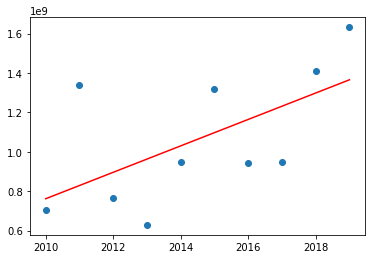

In [761]:
# visualization
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [762]:
# compute R^2 value
from sklearn.metrics import r2_score
r2_score(Y, Y_pred)

0.35987642668395436

8. In this question, we will examine whether contract expenditure goes to companies located within or outside of New York City. To do so, we will extract the ZIP codes from the VendorAddress field. The ZIP codes pertaining to New York City can be found at the following URL: https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm. Looking only at contracts with a StartDate in 2018, compute the total expenditure for contracts awarded to vendors listing NYC addresses and those located elsewhere. Report the proportion of the total expenditures awarded to the NYC vendors.

In [763]:
# web scraping
import requests

In [858]:
url = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm'
html = requests.get(url).content
df_list = pd.read_html(html)
df_list = df_list[-1]
df_list.to_csv('my data.csv')

In [859]:
df_list

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471"
5,Bronx,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Bronx,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,Brooklyn,Southwest Brooklyn,"11209, 11214, 11228"
9,Brooklyn,Borough Park,"11204, 11218, 11219, 11230"


In [860]:
df_list.iloc[6, -1]= "10461, 10462, 10464, 10465, 10472, 1047"

In [864]:
# df_list["ZIP Codes"].str.split(", ", expand=False)

0                                 [10453, 10457, 10460]
1                                 [10458, 10467, 10468]
2                                 [10451, 10452, 10456]
3                          [10454, 10455, 10459, 10474]
4                                        [10463, 10471]
5                          [10466, 10469, 10470, 10475]
6             [10461, 10462, 10464, 10465, 10472, 1047]
7                   [11212, 11213, 11216, 11233, 11238]
8                                 [11209, 11214, 11228]
9                          [11204, 11218, 11219, 11230]
10                                [11234, 11236, 11239]
11                         [11223, 11224, 11229, 11235]
12                  [11201, 11205, 11215, 11217, 11231]
13                         [11203, 11210, 11225, 11226]
14                                       [11207, 11208]
15                                       [11211, 11222]
16                                       [11220, 11232]
17                                [11206, 11221,

In [865]:
# df_list["ZIP Codes"]= df_list["ZIP Codes"].str.split(", ", None, expand = True) 
# array2 = df_list["ZIP Codes"].tolist()
array2 = []

for i in df_list.index:
    array2.extend(df_list.iloc[i, -1].split(", "))

In [867]:
array2

['10453',
 '10457',
 '10460',
 '10458',
 '10467',
 '10468',
 '10451',
 '10452',
 '10456',
 '10454',
 '10455',
 '10459',
 '10474',
 '10463',
 '10471',
 '10466',
 '10469',
 '10470',
 '10475',
 '10461',
 '10462',
 '10464',
 '10465',
 '10472',
 '1047',
 '11212',
 '11213',
 '11216',
 '11233',
 '11238',
 '11209',
 '11214',
 '11228',
 '11204',
 '11218',
 '11219',
 '11230',
 '11234',
 '11236',
 '11239',
 '11223',
 '11224',
 '11229',
 '11235',
 '11201',
 '11205',
 '11215',
 '11217',
 '11231',
 '11203',
 '11210',
 '11225',
 '11226',
 '11207',
 '11208',
 '11211',
 '11222',
 '11220',
 '11232',
 '11206',
 '11221',
 '11237',
 '10026',
 '10027',
 '10030',
 '10037',
 '10039',
 '10001',
 '10011',
 '10018',
 '10019',
 '10020',
 '10036',
 '10029',
 '10035',
 '10010',
 '10016',
 '10017',
 '10022',
 '10012',
 '10013',
 '10014',
 '10004',
 '10005',
 '10006',
 '10007',
 '10038',
 '10280',
 '10002',
 '10003',
 '10009',
 '10021',
 '10028',
 '10044',
 '10065',
 '10075',
 '10128',
 '10023',
 '10024',
 '10025',
 

In [892]:
df8 = df1

In [893]:
df8.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
5,20140821014,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-72-1B-C,NaN,NaN,NaN,NaN,NaN,819230.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nandita, Inc.","89-12 169th Street, 1st Floor, Jamaica, NY 11432",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
6,20160224001,2016-03-01,03/01/2016,Board of Elections,Award,Services (other than human services),TRANSLATOR /INTERPRETER SERVICES,Competitive Sealed Proposals,Procurement,Other (Describe below in Other Legally Mandate...,003201600302,NaN,NaN,NaN,NaN,NaN,500000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SBT Beauty Corp../DBA Speak at Ease,"10 Hillside Avenue,New York , NY 10040",TRANSLATOR /INTERPRETER SERVICES - Competitive...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
7,20150908019,2015-09-15,09/15/2015,Employees' Retirement System,Award,Services (other than human services),CHANGE MANAGEMENT TRAINING CONTRACT,Negotiated Acquisition,Procurement,Available only from a single source,009070820151,NaN,NaN,NaN,NaN,NaN,486150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CWI Coaching and Consulting,"1112 East Magdalena Drive, Tempe AZ 85283",CHANGE MANAGEMENT TRAINING CONTRACT - Negotiat...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [894]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18198 entries, 1 to 35502
Data columns (total 38 columns):
RequestID                       18198 non-null int64
StartDate                       18198 non-null datetime64[ns]
EndDate                         18198 non-null object
AgencyName                      18198 non-null object
TypeOfNoticeDescription         18198 non-null object
CategoryDescription             18198 non-null object
ShortTitle                      18198 non-null object
SelectionMethodDescription      18198 non-null object
SectionName                     18198 non-null object
SpecialCaseReasonDescription    6871 non-null object
PIN                             18198 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  18198 no

In [895]:
df8["Year"] = pd.DatetimeIndex(df8["StartDate"]).year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [896]:
df8.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year
1,20130214013,2013-02-22,02/22/2013,Parks and Recreation,Award,Services (other than human services),DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,Request for Proposals,Procurement,NaN,CWP2012A-M7-CG,NaN,NaN,NaN,NaN,NaN,25655.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AdamEric, Inc.","478A Lafayette Avenue, Brooklyn, NY 11205",DEPARTMENT OF PARKS AND RECREATION NOTICE OF...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
4,20140821015,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-E62-C,NaN,NaN,NaN,NaN,NaN,1130412.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MUN Trading Corporation,"37-38 84th Street, Apt. 21, Jackson Heights, N...",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
5,20140821014,2014-08-28,08/28/2014,Parks and Recreation,Award,Services (other than human services),OPERATION OF ONE NON-PROCESSING CART,Competitive Sealed Bids,Procurement,NaN,M10-72-1B-C,NaN,NaN,NaN,NaN,NaN,819230.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nandita, Inc.","89-12 169th Street, 1st Floor, Jamaica, NY 11432",OPERATION OF ONE NON-PROCESSING CART - Compet...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
6,20160224001,2016-03-01,03/01/2016,Board of Elections,Award,Services (other than human services),TRANSLATOR /INTERPRETER SERVICES,Competitive Sealed Proposals,Procurement,Other (Describe below in Other Legally Mandate...,003201600302,NaN,NaN,NaN,NaN,NaN,500000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SBT Beauty Corp../DBA Speak at Ease,"10 Hillside Avenue,New York , NY 10040",TRANSLATOR /INTERPRETER SERVICES - Competitive...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
7,20150908019,2015-09-15,09/15/2015,Employees' Retirement System,Award,Services (other than human services),CHANGE MANAGEMENT TRAINING CONTRACT,Negotiated Acquisition,Procurement,Available only from a single source,009070820151,NaN,NaN,NaN,NaN,NaN,486150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CWI Coaching and Consulting,"1112 East Magdalena Drive, Tempe AZ 85283",CHANGE MANAGEMENT TRAINING CONTRACT - Negotiat...,NaN,NaN,https://msdwvw-dcscro01.csc.nycnet/CROLPublicF...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [897]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18198 entries, 1 to 35502
Data columns (total 38 columns):
RequestID                       18198 non-null int64
StartDate                       18198 non-null datetime64[ns]
EndDate                         18198 non-null object
AgencyName                      18198 non-null object
TypeOfNoticeDescription         18198 non-null object
CategoryDescription             18198 non-null object
ShortTitle                      18198 non-null object
SelectionMethodDescription      18198 non-null object
SectionName                     18198 non-null object
SpecialCaseReasonDescription    6871 non-null object
PIN                             18198 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  18198 no

In [898]:
# consider only the year 2018
df8 = df8[df8["Year"] == 2018]

In [899]:
df8.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year
131,20180726005,2018-08-01,08/01/2018,Environmental Protection,Award,Construction/Construction Services,CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,Request for Proposals,Procurement,NaN,82617WM00304,NaN,NaN,NaN,NaN,NaN,3695800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hatch Associates Consultants, Inc.","100 Sylvan Parkway, Suite 200, Amherst, NY 14228",CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
136,20181205004,2018-12-11,12/11/2018,Dept Of Social Svcs/Human Resources Administra...,Award,Goods and Services,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2,Intergovernmental Purchase,Procurement,Judgment required in evaluating proposals,17OPMOT02401A02,NaN,NaN,NaN,NaN,NaN,7575925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Accenture Federal Services, LLC",800 North Glebe Road Suite 300 Arlington VA 22203,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
159,20180806008,2018-08-13,08/13/2018,Parks and Recreation,Award,Services (other than human services),"PATS ICE CREAM, INC. Q99-Z-MT",Competitive Sealed Bids,Procurement,NaN,CWB-2018-A,NaN,NaN,NaN,NaN,NaN,135200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pats Ice Cream, Inc.","114 Harbour Lane, West Bayshore, NY 11706","PATS ICE CREAM, INC. Q99-Z-MT - Competitive S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
163,20181108035,2018-11-16,11/16/2018,Environmental Protection,Award,Construction Related Services,CRO-521 CM: CONSTRUCTION MANAGEMENT SERVICES F...,Request for Proposals,Procurement,NaN,82618WM00339,NaN,NaN,NaN,NaN,NaN,5458941.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arcadis of New York, Inc.","27-01 Queens Plaza North, Suite 800, Long Isla...",CRO-521 CM: CONSTRUCTION MANAGEMENT SERVICES F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
172,20180508027,2018-05-15,05/15/2018,Commission on Human Rights,Award,Services (other than human services),RESEARCH AND ANALYTICAL SERVICE,Innovative Procurement,Procurement,Other (Describe below in Other Legally Mandate...,226005,NaN,NaN,NaN,NaN,NaN,90000.0,NaN,NaN,NaN,NaN,The City`s new M/WBE Procurement method requir...,NaN,NaN,Strength In Numbers Consulting,"22 West 27th Street, Fl # 5, New York, NY 10001",RESEARCH AND ANALYTICAL SERVICE - Innovative P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [900]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 131 to 35490
Data columns (total 38 columns):
RequestID                       2480 non-null int64
StartDate                       2480 non-null datetime64[ns]
EndDate                         2480 non-null object
AgencyName                      2480 non-null object
TypeOfNoticeDescription         2480 non-null object
CategoryDescription             2480 non-null object
ShortTitle                      2480 non-null object
SelectionMethodDescription      2480 non-null object
SectionName                     2480 non-null object
SpecialCaseReasonDescription    1140 non-null object
PIN                             2480 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  2480 non-null flo

In [901]:
df8["ZIP"] = df8["VendorAddress"].str.extract(r'(\d{5})')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [902]:
df8.head()

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year,ZIP
131,20180726005,2018-08-01,08/01/2018,Environmental Protection,Award,Construction/Construction Services,CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,Request for Proposals,Procurement,NaN,82617WM00304,NaN,NaN,NaN,NaN,NaN,3695800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hatch Associates Consultants, Inc.","100 Sylvan Parkway, Suite 200, Amherst, NY 14228",CRO-536 DES: DESIGN SERVICES FOR CROSS RIVER A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,14228
136,20181205004,2018-12-11,12/11/2018,Dept Of Social Svcs/Human Resources Administra...,Award,Goods and Services,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2,Intergovernmental Purchase,Procurement,Judgment required in evaluating proposals,17OPMOT02401A02,NaN,NaN,NaN,NaN,NaN,7575925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Accenture Federal Services, LLC",800 North Glebe Road Suite 300 Arlington VA 22203,RE-ENGINEERING VIRTUAL CLIENT SERVICES TO5 A2 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,22203
159,20180806008,2018-08-13,08/13/2018,Parks and Recreation,Award,Services (other than human services),"PATS ICE CREAM, INC. Q99-Z-MT",Competitive Sealed Bids,Procurement,NaN,CWB-2018-A,NaN,NaN,NaN,NaN,NaN,135200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pats Ice Cream, Inc.","114 Harbour Lane, West Bayshore, NY 11706","PATS ICE CREAM, INC. Q99-Z-MT - Competitive S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11706
163,20181108035,2018-11-16,11/16/2018,Environmental Protection,Award,Construction Related Services,CRO-521 CM: CONSTRUCTION MANAGEMENT SERVICES F...,Request for Proposals,Procurement,NaN,82618WM00339,NaN,NaN,NaN,NaN,NaN,5458941.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arcadis of New York, Inc.","27-01 Queens Plaza North, Suite 800, Long Isla...",CRO-521 CM: CONSTRUCTION MANAGEMENT SERVICES F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11101
172,20180508027,2018-05-15,05/15/2018,Commission on Human Rights,Award,Services (other than human services),RESEARCH AND ANALYTICAL SERVICE,Innovative Procurement,Procurement,Other (Describe below in Other Legally Mandate...,226005,NaN,NaN,NaN,NaN,NaN,90000.0,NaN,NaN,NaN,NaN,The City`s new M/WBE Procurement method requir...,NaN,NaN,Strength In Numbers Consulting,"22 West 27th Street, Fl # 5, New York, NY 10001",RESEARCH AND ANALYTICAL SERVICE - Innovative P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10001


In [903]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 131 to 35490
Data columns (total 39 columns):
RequestID                       2480 non-null int64
StartDate                       2480 non-null datetime64[ns]
EndDate                         2480 non-null object
AgencyName                      2480 non-null object
TypeOfNoticeDescription         2480 non-null object
CategoryDescription             2480 non-null object
ShortTitle                      2480 non-null object
SelectionMethodDescription      2480 non-null object
SectionName                     2480 non-null object
SpecialCaseReasonDescription    1140 non-null object
PIN                             2480 non-null object
DueDate                         0 non-null float64
AddressToRequest                0 non-null object
ContactName                     0 non-null object
ContactPhone                    0 non-null object
Email                           0 non-null object
ContractAmount                  2480 non-null flo

In [916]:
# find all the NYC vendors
array3 = set(df8["ZIP"].tolist())

In [924]:
df8_new = pd.DataFrame(columns = df8.columns)

In [925]:
for i in array3:
    if i in array2:
        df8_new = df8_new.append(df8[df8["ZIP"] == i])
    else: df8_new

In [926]:
df8_new

,RequestID,StartDate,EndDate,AgencyName,TypeOfNoticeDescription,CategoryDescription,ShortTitle,SelectionMethodDescription,SectionName,SpecialCaseReasonDescription,PIN,DueDate,AddressToRequest,ContactName,ContactPhone,Email,ContractAmount,ContactFax,AdditionalDescription1,AdditionalDesctription2,AdditionalDescription3,OtherInfo1,OtherInfo2,OtherInfo3,VendorName,VendorAddress,Printout1,Printout2,Printout3,DocumentLinks,EventDate,EventBuildingName,EventStreetAddress1,EventStreetAddress2,EventCity,EventStateCode,EventZipCode,Year,ZIP
4264,20180702030,2018-07-11,07/11/2018,Design and Construction,Award,Construction/Construction Services,NEW YORK HALL OF SCIENCE EXTERIOR LIGHTING FOR...,Competitive Sealed Bids,Procurement,NaN,85017B0127,NaN,NaN,NaN,NaN,NaN,945000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prespective Construction Company,"627 80th Street, Brooklyn, NY 11209",NEW YORK HALL OF SCIENCE EXTERIOR LIGHTING FOR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11209
7370,20180712022,2018-07-19,07/19/2018,Health and Mental Hygiene,Award,Human Services/Client Services,MENTAL HEALTH SERVICES FOR ADULTS,Required/Authorized Source,Procurement,Other (Describe below in Other Legally Mandate...,16AZ001801R1X00,NaN,NaN,NaN,NaN,NaN,1910424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Baltic Street Aeh, Inc","9201 4th Avenue, Brooklyn, Ny,11209",MENTAL HEALTH SERVICES FOR ADULTS - Required/A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11209
10330,20180725012,2018-08-01,08/01/2018,Health and Mental Hygiene,Award,Human Services/Client Services,MENTAL HEALTH SERVICES FOR ADULTS,Renewal,Procurement,NaN,12AZ032701R3X00,NaN,NaN,NaN,NaN,NaN,1689915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Baltic Street Aeh, Inc","9201 4th Avenue, Brooklyn, Ny,11209",MENTAL HEALTH SERVICES FOR ADULTS - Renewal - ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11209
14456,20181119023,2018-11-27,11/27/2018,Aging,Award,Human Services/Client Services,SENIOR SERVICES,BP/City Council Discretionary,Procurement,NaN,12519L0056001,NaN,NaN,NaN,NaN,NaN,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bay Ridge Center, Inc.","411 Ovington Avenue, Brooklyn, New York 11209",SENIOR SERVICES - BP/City Council Discretionar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11209
275,20181024009,2018-11-01,11/01/2018,Design and Construction,Award,Construction/Construction Services,67TH STREET BRANCH LIBRARY HVAC AND ROOF UPGRA...,Competitive Sealed Bids,Procurement,NaN,85018B0039,NaN,NaN,NaN,NaN,NaN,1758533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDE Air Conditioning Co.,"321 39th Street, Brooklyn, NY 112232",67TH STREET BRANCH LIBRARY HVAC AND ROOF UPGRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,11223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30543,20180605054,2018-06-12,06/12/2018,Information Technology and Telecommunications,Award,Goods and Services,CITYWIDE TELECOMMUNICATION SERVICES,Competitive Sealed Proposals,Procurement,Judgment required in evaluating proposals,85813P0002007,NaN,NaN,NaN,NaN,NaN,279000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verizon Business Network Services Inc.,"140 West Street, New York, NY 10007",CITYWIDE TELECOMMUNICATION SERVICES - Competit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10007
31310,20180918018,2018-09-25,09/25/2018,Citywide Administrative Services,Award,Goods,"HOSE, FIRE RACK WITH COUPLINGS",Competitive Sealed Bids,Procurement,NaN,8571700365,NaN,NaN,NaN,NaN,NaN,582996.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H J Murray and Co Inc,"66 Reade Street, New York, NY 10007","HOSE, FIRE RACK WITH COUPLINGS - Competitive S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,10007
31651,20181211031,2018-12-18,12/18/2018,Parks and Recreation,Award,Construction Related Services,ENVIRONMENTAL ENGINEERING SERVICES,Renewal,Procurement,NaN,84614P0001001R001,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Integral Engineering, P.C.","22 Cortlandt Street, Floor 16, New York, NY 1...",ENVIRONM

In [931]:
# compute the total expenditure for NYC vendors
expense_nyc = df8_new["ContractAmount"].sum()
expense_nyc

6301991984.6

In [932]:
# compute the total expenditure for all vendors
expense_total = df8["ContractAmount"].sum()
expense_total

18743121770.029995

In [933]:
# compute the total expenditure for vendors outside NYC
expense_outside = df8["ContractAmount"].sum() - df8_new["ContractAmount"].sum()
expense_outside

12441129785.429995

In [935]:
proportion_nyc = expense_nyc / expense_total
proportion_nyc

0.3362295812790803